## 问答

0. Can you come up out 3 sceneraies which use AI methods?
Ans: {聊天机器人,知识图谱,自动驾驶}

1. How do we use Github; Why do we use Jupyter and Pycharm;
Ans: {使用方便}

2. What's the Probability Model?
Ans:朴素贝叶斯

3. Can you came up with some sceneraies at which we could use Probability Model?
Ans:推荐,实体识别,文本分类

4. Why do we use probability and what's the difficult points for programming based on parsing and pattern match?
Ans:不够通用,规则修改,程序就要跟着修改

5. What's the Language Model;
Ans:统计语言模型是一个单词序列上的概率分布，对于一个给定长度为m的序列，它可以为整个序列产生一个概率 P(w_1,w_2,…,w_m) 。其实就是想办法找到一个概率分布，它可以表示任意一个句子或序列出现的概率。

6. Can you came up with some sceneraies at which we could use Language Model?
Ans:语音识别(speech recognition) , 机器翻译(machine translation), 词性标注(part-of-speech tagging), 句法分析(parsing)

7. What's the 1-gram language model;
Ans:一个item的出现概率，只与其前m个items有关,m=1,就是1-gram模型

8. What's the disadvantages and advantages of 1-gram language model;
Ans:计算速度快,性能高,缺点,单词彼此间相互独立,丢失上下文信息

9. What't the 2-gram models;
Ans:一个item的出现概率，只与其前m个items有关,m=2,就是2-gram模型


## 代码复现

In [5]:
import random
import pandas as pd
import re
from collections import Counter
import jieba
from functools import reduce
from operator import add, mul
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [30]:
### 参数加载
input_file_path = 'dataset/input/'
output_file_path = 'dataset/output/'
tmp_file_path = 'dataset/tmp/'

In [2]:
simple_grammar = """
sentence => noun_phrase verb_phrase
noun_phrase => Article Adj* noun
Adj* => null | Adj Adj*
verb_phrase => verb noun_phrase
Article =>  一个 | 这个
noun =>   女人 |  篮球 | 桌子 | 小猫
verb => 看着   |  坐在 |  听着 | 看见
Adj =>  蓝色的 | 好看的 | 小小的
"""

In [26]:
def adj():
    return random.choice('蓝色的 | 好看的 | 小小的'.split('|')).replace(' ','')

In [27]:
def adj_star():
    return random.choice([lambda:'' , lambda:adj()+adj_star()])()

In [28]:
adj_star()

'小小的蓝色的小小的'

In [29]:
adj_grammar = """
Adj* => null | Adj Adj*
Adj =>  蓝色的 | 好看的 | 小小的
"""

In [101]:
def create_grammar(grammar_str, split='=>', line_split='\n'):
    grammar = {}
    for line in grammar_str.split(line_split):
        if not line.strip(): continue
        exp, stmt = line.split(split)
        grammar[exp.strip()] = [s.split() for s in stmt.split('|')]
    return grammar

In [102]:
grammar=create_grammar(adj_grammar)

In [103]:
grammar['Adj*']

[['null'], ['Adj', 'Adj*']]

In [116]:
gram=create_grammar(human, split='=')

In [117]:
gram

{'human': [['自己', '寻找', '活动']],
 '寻找': [['找找'], ['想找点']],
 '活动': [['乐子'], ['玩的']],
 '自己': [['我'], ['俺'], ['我们']]}

In [106]:
random.choice(gram)

['自己', '寻找', '活动']

In [118]:
def generate(gram, target):
    if target not in gram: return target # means target is a terminal expression
    
    expaned = [generate(gram, t) for t in random.choice(gram[target])]
    return ''.join([e if e != '/n' else '\n' for e in expaned if e != 'null'])

In [119]:
generate(gram=create_grammar(human, split='='), target='human')

'俺找找玩的'

In [88]:
generate(create_grammar(human, split='='), target='human')

'我们找找玩的'

In [87]:
generate(gram=create_grammar(host, split='='), target='host')

'您好我是6号,请问你要打牌吗？'

In [52]:
#在西部世界里，一个”人类“的语言可以定义为：

human = """
human = 自己 寻找 活动
自己 = 我 | 俺 | 我们 
寻找 = 找找 | 想找点 
活动 = 乐子 | 玩的
"""


#一个“接待员”的语言可以定义为

host = """
host = 寒暄 报数 询问 业务相关 结尾 
报数 = 我是 数字 号 ,
数字 = 单个数字 | 数字 单个数字 
单个数字 = 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 
寒暄 = 称谓 打招呼 | 打招呼
称谓 = 人称 ,
人称 = 先生 | 女士 | 小朋友
打招呼 = 你好 | 您好 
询问 = 请问你要 | 您需要
业务相关 = 玩玩 具体业务
玩玩 = null
具体业务 = 喝酒 | 打牌 | 打猎 | 赌博
结尾 = 吗？
"""

In [122]:
for i in range(20):
    print(generate(gram=create_grammar(host, split='='), target='host'))

您好我是2号,您需要打猎吗？
女士,你好我是8291号,请问你要赌博吗？
你好我是47号,请问你要打牌吗？
先生,你好我是3号,您需要喝酒吗？
你好我是7321号,请问你要打牌吗？
你好我是3号,您需要打牌吗？
小朋友,您好我是63号,您需要喝酒吗？
您好我是8号,您需要打牌吗？
女士,您好我是62号,请问你要打猎吗？
你好我是23号,请问你要打猎吗？
女士,你好我是6号,请问你要打牌吗？
女士,你好我是3号,请问你要打牌吗？
您好我是73872号,您需要打猎吗？
女士,你好我是1号,请问你要喝酒吗？
你好我是2号,请问你要打猎吗？
你好我是9号,您需要喝酒吗？
您好我是3号,请问你要打牌吗？
先生,您好我是1号,您需要打牌吗？
小朋友,您好我是33号,您需要喝酒吗？
女士,您好我是71号,请问你要打牌吗？


In [66]:
programming = """
stmt => if_exp | while_exp | assignment 
assignment => var = var
if_exp => if ( var ) { /n .... stmt }
while_exp=> while ( var ) { /n .... stmt }
var => chars number
chars => char | char char
char => student | name | info  | database | course
number => 1 | 2 | 3
"""

In [120]:
print(generate(gram=create_grammar(programming, split='=>'), target='stmt'))

info1=studentinfo2


In [127]:
filename = input_file_path+'sqlResult_1558435.csv'

In [128]:
content = pd.read_csv(filename, encoding='gb18030')

In [129]:
content.head()

,id,author,source,content,feature,title,url
0,89617,NaN,快科技@http://www.kkj.cn/,此外，自本周（6月12日）起，除小米手机6等15款机型外，其余机型已暂停更新发布（含开发版/...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""37""...",小米MIUI 9首批机型曝光：共计15款,http://www.cnbeta.com/articles/tech/623597.htm
1,89616,NaN,快科技@http://www.kkj.cn/,骁龙835作为唯一通过Windows 10桌面平台认证的ARM处理器，高通强调，不会因为只考...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""15""...",骁龙835在Windows 10上的性能表现有望改善,http://www.cnbeta.com/articles/tech/623599.htm
2,89615,NaN,快科技@http://www.kkj.cn/,此前的一加3T搭载的是3400mAh电池，DashCharge快充规格为5V/4A。\r\n...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""18""...",一加手机5细节曝光：3300mAh、充半小时用1天,http://www.cnbeta.com/articles/tech/623601.htm
3,89614,NaN,新华社,这是6月18日在葡萄牙中部大佩德罗冈地区拍摄的被森林大火烧毁的汽车。新华社记者张立云摄\r\n,"{""type"":""国际新闻"",""site"":""环球"",""commentNum"":""0"",""j...",葡森林火灾造成至少62人死亡 政府宣布进入紧急状态（组图）,http://world.huanqiu.com/hot/2017-06/10866126....
4,89613,胡淑丽_MN7479,深圳大件事,（原标题：44岁女子跑深圳约会网友被拒，暴雨中裸身奔走……）\r\n@深圳交警微博称：昨日清...,"{""type"":""新闻"",""site"":""网易热门"",""commentNum"":""978"",...",44岁女子约网友被拒暴雨中裸奔 交警为其披衣相随,http://news.163.com/17/0618/00/CN617P3Q0001875...


In [130]:
articles = content['content'].tolist()

In [131]:
len(articles)

89611

In [133]:
articles[110]

'在外国名著《麦田里的守望者》中，作者想要守护麦田里如自己内心一般纯真的孩子们。而驻村干部们，也在这个炎热的夏天里撸袖子上阵，真正做起了村民们的“麦田守望者”。\r\n三夏时节不等人\r\n你看到了吗？不停翻涌起伏、仿若铺陈至天边的金黄麦浪中，那若隐若现的人影，是自治区新闻出版广电局驻和田市肖尔巴格乡合尼村工作队的队员与工作队组织的青年志愿者。\r\n在这个炎热的夏季，他们深入田间地头，帮助村民们收割小麦。扛起收麦机，麦田中的每个人都显得兴致勃勃，一天下来就近22亩小麦收割完毕。\r\n志愿者麦麦提亚森擦去满脸的汗水，高兴地告诉驻村队员：“我们青年志愿者应该多做贡献，为村里的脱贫致富出把力。工作队带着我们为村里的老人服务，看到那些像我爷爷奶奶一样的老人赞许感谢的目光，我体会到了帮助他人的快乐。”（自治区新闻出版广电局驻村工作队孙敏 艾力依布拉音）\r\n麦收时节 我们在一起\r\n6月中旬的和田墨玉，麦田金黄，静待收割。\r\n6月14日、15日两天，自治区高级人民法院驻和田地区墨玉县吐外特乡罕勒克艾日克村工作队与48名村民志愿者一道，帮助村里29户有需要的村民进行小麦收割工作。\r\n田间地头，罕勒克艾日克村志愿队的红旗迎风飘扬，格外醒目。10余台割麦机一起轰鸣，男人们在用机器收割小麦的同时，几名妇女也加入到志愿队，构成了一道美丽的麦收风景。\r\n休息空闲，工作队员和村民们坐在树荫下、田埂上，互相问好、聊天。语言交流有困难，就用手势、动作比划着聊天，有趣地交流方式不时引来阵阵欢笑。大家在一同享受丰收和喜悦，也一同增进着彼此的情感和友谊。（自治区高级人民法院驻村工作队周春梅 艾地艾木·阿不拉）\r\n细看稻菽千重浪\r\n6月15日，自治区煤田灭火工程局的干部职工们再一次跋涉1000多公里来到了叶城县萨依巴格乡阿亚格欧尔达贝格村，见到了自己的亲戚。现场处处都透出掩盖不住的喜悦，一声声亲切的“谢谢”、一个个结实的拥抱，都透露出浓浓的亲情。\r\n没坐一会儿，在嘘寒问暖中大家了解到在麦收的关键时刻，部分村民家中却存在收割难的问题。小麦成熟期短，收获的时间集中，天气的变化对小麦最终产量的影响极大，如果不能及时收割，会有不小损失的。于是，大家几乎立刻就决定要帮助亲戚们收割麦子。\r\n在茂密的麦地里，干部们每人手持一把镰刀，一字排开，挽起衣袖、卷起裤腿，挥舞着镰刀进行着无

In [134]:
def token(string):
    return re.findall('\w+',string)

In [135]:
token(articles[110])

['在外国名著',
 '麦田里的守望者',
 '中',
 '作者想要守护麦田里如自己内心一般纯真的孩子们',
 '而驻村干部们',
 '也在这个炎热的夏天里撸袖子上阵',
 '真正做起了村民们的',
 '麦田守望者',
 '三夏时节不等人',
 '你看到了吗',
 '不停翻涌起伏',
 '仿若铺陈至天边的金黄麦浪中',
 '那若隐若现的人影',
 '是自治区新闻出版广电局驻和田市肖尔巴格乡合尼村工作队的队员与工作队组织的青年志愿者',
 '在这个炎热的夏季',
 '他们深入田间地头',
 '帮助村民们收割小麦',
 '扛起收麦机',
 '麦田中的每个人都显得兴致勃勃',
 '一天下来就近22亩小麦收割完毕',
 '志愿者麦麦提亚森擦去满脸的汗水',
 '高兴地告诉驻村队员',
 '我们青年志愿者应该多做贡献',
 '为村里的脱贫致富出把力',
 '工作队带着我们为村里的老人服务',
 '看到那些像我爷爷奶奶一样的老人赞许感谢的目光',
 '我体会到了帮助他人的快乐',
 '自治区新闻出版广电局驻村工作队孙敏',
 '艾力依布拉音',
 '麦收时节',
 '我们在一起',
 '6月中旬的和田墨玉',
 '麦田金黄',
 '静待收割',
 '6月14日',
 '15日两天',
 '自治区高级人民法院驻和田地区墨玉县吐外特乡罕勒克艾日克村工作队与48名村民志愿者一道',
 '帮助村里29户有需要的村民进行小麦收割工作',
 '田间地头',
 '罕勒克艾日克村志愿队的红旗迎风飘扬',
 '格外醒目',
 '10余台割麦机一起轰鸣',
 '男人们在用机器收割小麦的同时',
 '几名妇女也加入到志愿队',
 '构成了一道美丽的麦收风景',
 '休息空闲',
 '工作队员和村民们坐在树荫下',
 '田埂上',
 '互相问好',
 '聊天',
 '语言交流有困难',
 '就用手势',
 '动作比划着聊天',
 '有趣地交流方式不时引来阵阵欢笑',
 '大家在一同享受丰收和喜悦',
 '也一同增进着彼此的情感和友谊',
 '自治区高级人民法院驻村工作队周春梅',
 '艾地艾木',
 '阿不拉',
 '细看稻菽千重浪',
 '6月15日',
 '自治区煤田灭火工程局的干部职工们再一次跋涉1000多公里来到了叶城县萨依巴格乡阿亚格欧尔达贝格村',
 '见到了自己的亲戚',
 '现场处处都

In [136]:
with_jieba_cut = Counter(jieba.cut(articles[110]))

Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/qr/v4l9n54x0zs849b_q55msxjc0000gn/T/jieba.cache
Loading model cost 0.836 seconds.
Prefix dict has been built succesfully.


In [139]:
with_jieba_cut.most_common()[:10]

[('，', 88),
 ('的', 73),
 ('。', 39),
 ('\r\n', 27),
 ('了', 20),
 ('们', 18),
 ('工作队', 16),
 ('村民', 15),
 ('收割', 14),
 ('、', 12)]

In [140]:
''.join(token(articles[110]))

'在外国名著麦田里的守望者中作者想要守护麦田里如自己内心一般纯真的孩子们而驻村干部们也在这个炎热的夏天里撸袖子上阵真正做起了村民们的麦田守望者三夏时节不等人你看到了吗不停翻涌起伏仿若铺陈至天边的金黄麦浪中那若隐若现的人影是自治区新闻出版广电局驻和田市肖尔巴格乡合尼村工作队的队员与工作队组织的青年志愿者在这个炎热的夏季他们深入田间地头帮助村民们收割小麦扛起收麦机麦田中的每个人都显得兴致勃勃一天下来就近22亩小麦收割完毕志愿者麦麦提亚森擦去满脸的汗水高兴地告诉驻村队员我们青年志愿者应该多做贡献为村里的脱贫致富出把力工作队带着我们为村里的老人服务看到那些像我爷爷奶奶一样的老人赞许感谢的目光我体会到了帮助他人的快乐自治区新闻出版广电局驻村工作队孙敏艾力依布拉音麦收时节我们在一起6月中旬的和田墨玉麦田金黄静待收割6月14日15日两天自治区高级人民法院驻和田地区墨玉县吐外特乡罕勒克艾日克村工作队与48名村民志愿者一道帮助村里29户有需要的村民进行小麦收割工作田间地头罕勒克艾日克村志愿队的红旗迎风飘扬格外醒目10余台割麦机一起轰鸣男人们在用机器收割小麦的同时几名妇女也加入到志愿队构成了一道美丽的麦收风景休息空闲工作队员和村民们坐在树荫下田埂上互相问好聊天语言交流有困难就用手势动作比划着聊天有趣地交流方式不时引来阵阵欢笑大家在一同享受丰收和喜悦也一同增进着彼此的情感和友谊自治区高级人民法院驻村工作队周春梅艾地艾木阿不拉细看稻菽千重浪6月15日自治区煤田灭火工程局的干部职工们再一次跋涉1000多公里来到了叶城县萨依巴格乡阿亚格欧尔达贝格村见到了自己的亲戚现场处处都透出掩盖不住的喜悦一声声亲切的谢谢一个个结实的拥抱都透露出浓浓的亲情没坐一会儿在嘘寒问暖中大家了解到在麦收的关键时刻部分村民家中却存在收割难的问题小麦成熟期短收获的时间集中天气的变化对小麦最终产量的影响极大如果不能及时收割会有不小损失的于是大家几乎立刻就决定要帮助亲戚们收割麦子在茂密的麦地里干部们每人手持一把镰刀一字排开挽起衣袖卷起裤腿挥舞着镰刀进行着无声的竞赛骄阳似火汗如雨下但这都挡不住大家的热情随着此起彼伏的镰刀割倒麦子的刷刷声响不一会一束束沉甸甸的麦穗就被整齐地堆放了起来当看到自己亲手收割的金黄色麦穗被一簇簇地打成捆运送到晒场每个人的脸上都露出了灿烂的笑容自治区煤田灭火工程局驻村工作队马浩南这是一个收获多多的季节6月1

In [141]:
articles_clean = [''.join(token(str(a)))for a in articles]

In [142]:
with open(output_file_path+'article_9k.txt', 'w') as f:
    for a in articles_clean:
        f.write(a + '\n')

In [143]:
def cut(string): return jieba.lcut(string)

In [145]:
TOKEN = []

In [147]:
for i,line in enumerate(open(output_file_path+'article_9k.txt')):
    if i%100== 0: print(i)
    if i > 10000: break    
    TOKEN += cut(line)      

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000


In [149]:
TOKEN[1]

'自'

In [151]:
words_count = Counter(TOKEN)

In [152]:
words_count.most_common(100)

[('的', 184244),
 ('在', 47370),
 ('了', 36722),
 ('和', 30809),
 ('是', 30283),
 ('月', 18711),
 ('也', 15995),
 ('年', 15971),
 ('有', 14714),
 ('为', 14448),
 ('等', 14340),
 ('将', 14060),
 ('对', 13074),
 ('与', 12568),
 ('日', 12322),
 ('中', 11117),
 ('中国', 11036),
 ('6', 10477),
 ('上', 10192),
 ('不', 10027),
 ('\n', 10001),
 ('他', 9530),
 ('都', 9447),
 ('发展', 8795),
 ('企业', 8584),
 ('就', 8537),
 ('到', 8338),
 ('市场', 8095),
 ('但', 7729),
 ('这', 7658),
 ('被', 7575),
 ('从', 7513),
 ('并', 7412),
 ('人', 7339),
 ('后', 7084),
 ('公司', 6915),
 ('一个', 6772),
 ('说', 6703),
 ('新', 6467),
 ('表示', 6309),
 ('要', 6276),
 ('还', 6245),
 ('会', 6179),
 ('个', 6176),
 ('我', 6141),
 ('而', 6090),
 ('进行', 5802),
 ('我们', 5742),
 ('记者', 5734),
 ('以', 5615),
 ('5', 5569),
 ('工作', 5135),
 ('没有', 5000),
 ('美国', 4840),
 ('下', 4741),
 ('更', 4739),
 ('通过', 4720),
 ('大', 4704),
 ('让', 4701),
 ('可以', 4681),
 ('经济', 4670),
 ('时', 4654),
 ('目前', 4645),
 ('国家', 4628),
 ('项目', 4538),
 ('问题', 4422),
 ('创新', 4416),
 ('多', 4410),
 ('已

In [153]:
frequiences = [f for w, f in words_count.most_common(100)]

In [154]:
x = [i for i in range(100)]

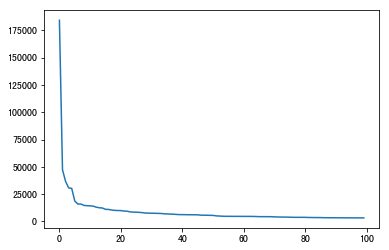

In [156]:
plt.plot(x, frequiences)

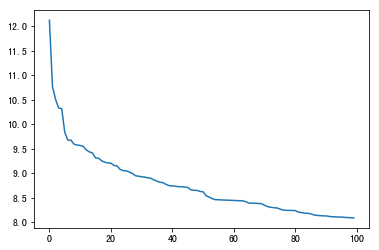

In [159]:
plt.plot(x, np.log(frequiences))

In [160]:
def prob_1(word):
    return words_count[word] / len(TOKEN)

In [161]:
TOKEN = [str(t) for t in TOKEN]

In [171]:
TOKEN_2_GRAM=[TOKEN[i]+TOKEN[i+1] for i in range(len(TOKEN)-1)]

In [172]:
TOKEN_2_GRAM[:10]

['此外自', '自本周', '本周6', '6月', '月12', '12日起', '日起除', '除小米', '小米手机', '手机6']

In [184]:
words_count_2 = Counter(TOKEN_2_GRAM)

In [187]:
def prob_2(word1,word2):
    if (word1+word2) in words_count_2:
        return words_count_2[word1+word2]/len(TOKEN_2_GRAM)
    else:
        return 1/len(TOKEN_2_GRAM)

In [188]:
prob_2('我们', '在')

4.6834540067219745e-05

In [186]:
words_count_2['我们在']

173

In [193]:
def get_probablity(sentence):
    words = cut(sentence)
    sentence_pro = 1
    for i, word in enumerate(words[:-1]):
        next_ = words[i+1]
        probability = prob_2(word, next_)
        sentence_pro *= probability
    return sentence_pro

In [194]:
get_probablity('小明今天抽奖抽到一台苹果手机')

6.298554938443348e-39

In [195]:
get_probablity('小明今天抽奖抽到一台苹果手机')

6.298554938443348e-39

In [198]:
need_compared = [
    "今天晚上请你吃大餐，我们一起吃日料 明天晚上请你吃大餐，我们一起吃苹果",
    "真事一只好看的小猫 真是一只好看的小猫",
    "今晚我去吃火锅 今晚火锅去吃我",
    "洋葱奶昔来一杯 养乐多绿来一杯"
]

for s in need_compared:
    s1, s2 = s.split()
    p1, p2 = get_probablity(s1), get_probablity(s2)
    
    better = s1 if p1 > p2 else s2
    
    print('{} is more possible'.format(better))
    print('-'*4 + ' {} with probility {}'.format(s1, p1))
    print('-'*4 + ' {} with probility {}'.format(s2, p2))

明天晚上请你吃大餐，我们一起吃苹果 is more possible
---- 今天晚上请你吃大餐，我们一起吃日料 with probility 1.7051087550551826e-62
---- 明天晚上请你吃大餐，我们一起吃苹果 with probility 1.7051087550551826e-62
真是一只好看的小猫 is more possible
---- 真事一只好看的小猫 with probility 1.5995339698348758e-32
---- 真是一只好看的小猫 with probility 5.908446552144404e-26
今晚我去吃火锅 is more possible
---- 今晚我去吃火锅 with probility 8.333160756659978e-19
---- 今晚火锅去吃我 with probility 1.9336734170654417e-25
养乐多绿来一杯 is more possible
---- 洋葱奶昔来一杯 with probility 1.984085894442852e-20
---- 养乐多绿来一杯 with probility 7.3289256016172e-14


## 编程实践部分

In [1]:
def create_grammar(grammar_str, split='=>', line_split='\n'):
    grammar = {}
    for line in grammar_str.split(line_split):
        if not line.strip(): continue
        exp, stmt = line.split(split)
        grammar[exp.strip()] = [s.split() for s in stmt.split('|')]
    return grammar

In [2]:
def generate(gram, target):
    if target not in gram: return target # means target is a terminal expression
    
    expaned = [generate(gram, t) for t in random.choice(gram[target])]
    return ''.join([e if e != '/n' else '\n' for e in expaned if e != 'null'])

In [13]:
person = """
person = 主体 动作 adj 活动
主体 = 我 | 我们 | 咱们 | 寡人 adj
动作 = 找找 | 想找点 | 想探索
adj = 有意思的 | 无趣的 | 刺激的
活动 = 五子棋 | 连连看 | 飞行棋
"""


npc = """
host = 寒暄 报数 询问 业务相关 结尾 
报数 = 我是 数字 号 ,
数字 = 单个数字 | 数字 单个数字 
单个数字 = 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 
寒暄 = 称谓 打招呼 | 打招呼
称谓 = 人称 ,
人称 = 先生 | 女士 | 小朋友
打招呼 = 你好 | 您好 
询问 = 请问你要 | 您需要
业务相关 = 玩玩 具体业务
玩玩 = null
具体业务 = 喝酒 | 打牌 | 打猎 | 赌博
结尾 = 吗？
"""

In [27]:
generate(create_grammar(person,split='='),target='person')

'我想探索刺激的飞行棋'

TODO: 然后，定义一个函数，generate_n，将generate扩展，使其能够生成n个句子:

In [28]:
def generate_n():
    n=random.randint(0, 9)
    for i in range(n):
        print(generate(create_grammar(person,split='='),target='person'))

In [29]:
generate_n()

咱们找找刺激的五子棋
我们找找有意思的飞行棋
寡人有意思的找找刺激的五子棋


#### 2. 使用新数据源完成语言模型的训练

In [37]:
filename=input_file_path+'movie_comments.csv'

In [35]:
data=pd.read_csv(filename, encoding='utf-8')

/Users/lpc/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (0,4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [36]:
data.head()

,id,link,name,comment,star
0,1,https://movie.douban.com/subject/26363254/,战狼2,吴京意淫到了脑残的地步，看了恶心想吐,1
1,2,https://movie.douban.com/subject/26363254/,战狼2,首映礼看的。太恐怖了这个电影，不讲道理的，完全就是吴京在实现他这个小粉红的英雄梦。各种装备轮...,2
2,3,https://movie.douban.com/subject/26363254/,战狼2,吴京的炒作水平不输冯小刚，但小刚至少不会用主旋律来炒作…吴京让人看了不舒服，为了主旋律而主旋...,2
3,4,https://movie.douban.com/subject/26363254/,战狼2,凭良心说，好看到不像《战狼1》的续集，完虐《湄公河行动》。,4
4,5,https://movie.douban.com/subject/26363254/,战狼2,中二得很,1


In [38]:
data['name'].value_counts()

当幸福来敲门 The Pursuit of Happyness                 396
李雷和韩梅梅                                          384
湄公河行动                                           320
少年派的奇幻漂流 Life of Pi                             220
辛德勒的名单 Schindler's List                         220
万万没想到                                           219
大卫·戈尔的一生 The Life of David Gale                 219
赎罪 Atonement                                    219
栀子花开                                            218
我是山姆 I Am Sam                                   218
惊天魔盗团2 Now You See Me 2                         218
怦然星动                                            218
夺命金 奪命金                                         217
我是证人                                            217
萤火奇兵                                            217
万夫莫敌 Invincible                                 217
银河系漫游指南 The Hitchhiker's Guide to the Galaxy    217
金蝉脱壳 Escape Plan                                217
八月：奥色治郡 August: Osage County                    216
太极2：英雄崛起    

In [50]:
def token(x):
    return re.findall('\w+',str(x))

comment_list=data['comment'].values

In [51]:
len(comment_list)

261497

In [52]:
comment_list_clean=[''.join(token(i)) for i in content_list]

In [53]:
comment_list_clean[0:2]

['吴京意淫到了脑残的地步看了恶心想吐',
 '首映礼看的太恐怖了这个电影不讲道理的完全就是吴京在实现他这个小粉红的英雄梦各种装备轮番上场视物理逻辑于不顾不得不说有钱真好随意胡闹']

In [54]:
def cut(string): return jieba.lcut(string)

In [66]:
TOKEN=[]

In [67]:
for i,line in enumerate(comment_list_clean):
    if i%1000==0:print(i)
    if i==4000:break
    TOKEN+=(cut(line))

0
1000
2000
3000
4000


In [69]:
TOKEN=[str(i) for i in TOKEN]

In [71]:
TOKEN_2gram=[TOKEN[i]+TOKEN[i+1] for i in range(len(TOKEN)-1)]

In [73]:
TOKEN_2gram[0:4]

['吴京意淫', '意淫到', '到了', '了脑残']

In [77]:
words_count_2=Counter(TOKEN_2gram)

In [84]:
def prob_2(word1,word2):
    if (word1+word2) in words_count_2:
        return words_count_2[word1+word2]/len(TOKEN_2gram)
    else:
        return 1/len(TOKEN_2gram)

In [85]:
def get_probablity(x):
    a=cut(x)
    c=1.0
    for i in range(len(a)-1):
        c*=prob_2(a[i],a[i+1])
    return c

In [86]:
get_probablity('小明今天抽奖抽到一台苹果手机')

1.0942538557434657e-30

#### 3. 获得最优质的的语言

In [115]:
def generate_n2(n):
    list_str=[]
    for i in range(n):
        list_str.append(generate(create_grammar(person,split='='),target='person'))
    return list_str

In [143]:
def generate_best(): # you code here
    str_list=generate_n2(6)
    prob_list=[get_probablity(i) for i in str_list]
    dd=zip(str_list,prob_list)
    dd=sorted(dd, key=lambda x: x[1],reverse = True)
    for i in dd:
        print(i)

In [144]:
generate_best()

('我想探索刺激的五子棋', 3.880618103854398e-24)
('咱们想找点有意思的五子棋', 4.311797893171552e-25)
('我们想找点刺激的连连看', 2.155898946585776e-25)
('寡人刺激的想探索无趣的连连看', 1.777287756765349e-34)
('寡人无趣的找找无趣的五子棋', 1.777287756765349e-34)
('寡人刺激的想找点刺激的飞行棋', 8.886438783826745e-35)
